# **Importing Required Libraries**

In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [250]:
df = pd.read_csv(r"https://raw.githubusercontent.com/Yadav-Roshan/House_Price_Prediction/main/houseprice.csv")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [251]:
df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [252]:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [253]:
df.shape

(414, 9)

# **Feature Engineering**

In [254]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

## **Statistical Description**

In [255]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
House Age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
Number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Number of bedrooms,414.0,1.987923,0.818875,1.00000,1.000000,2.00000,3.000000,3.00000
House size (sqft),414.0,931.475845,348.910269,402.00000,548.000000,975.00000,1234.750000,1500.00000
House price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


## **An Attempt to Observe Relationship Between Features**

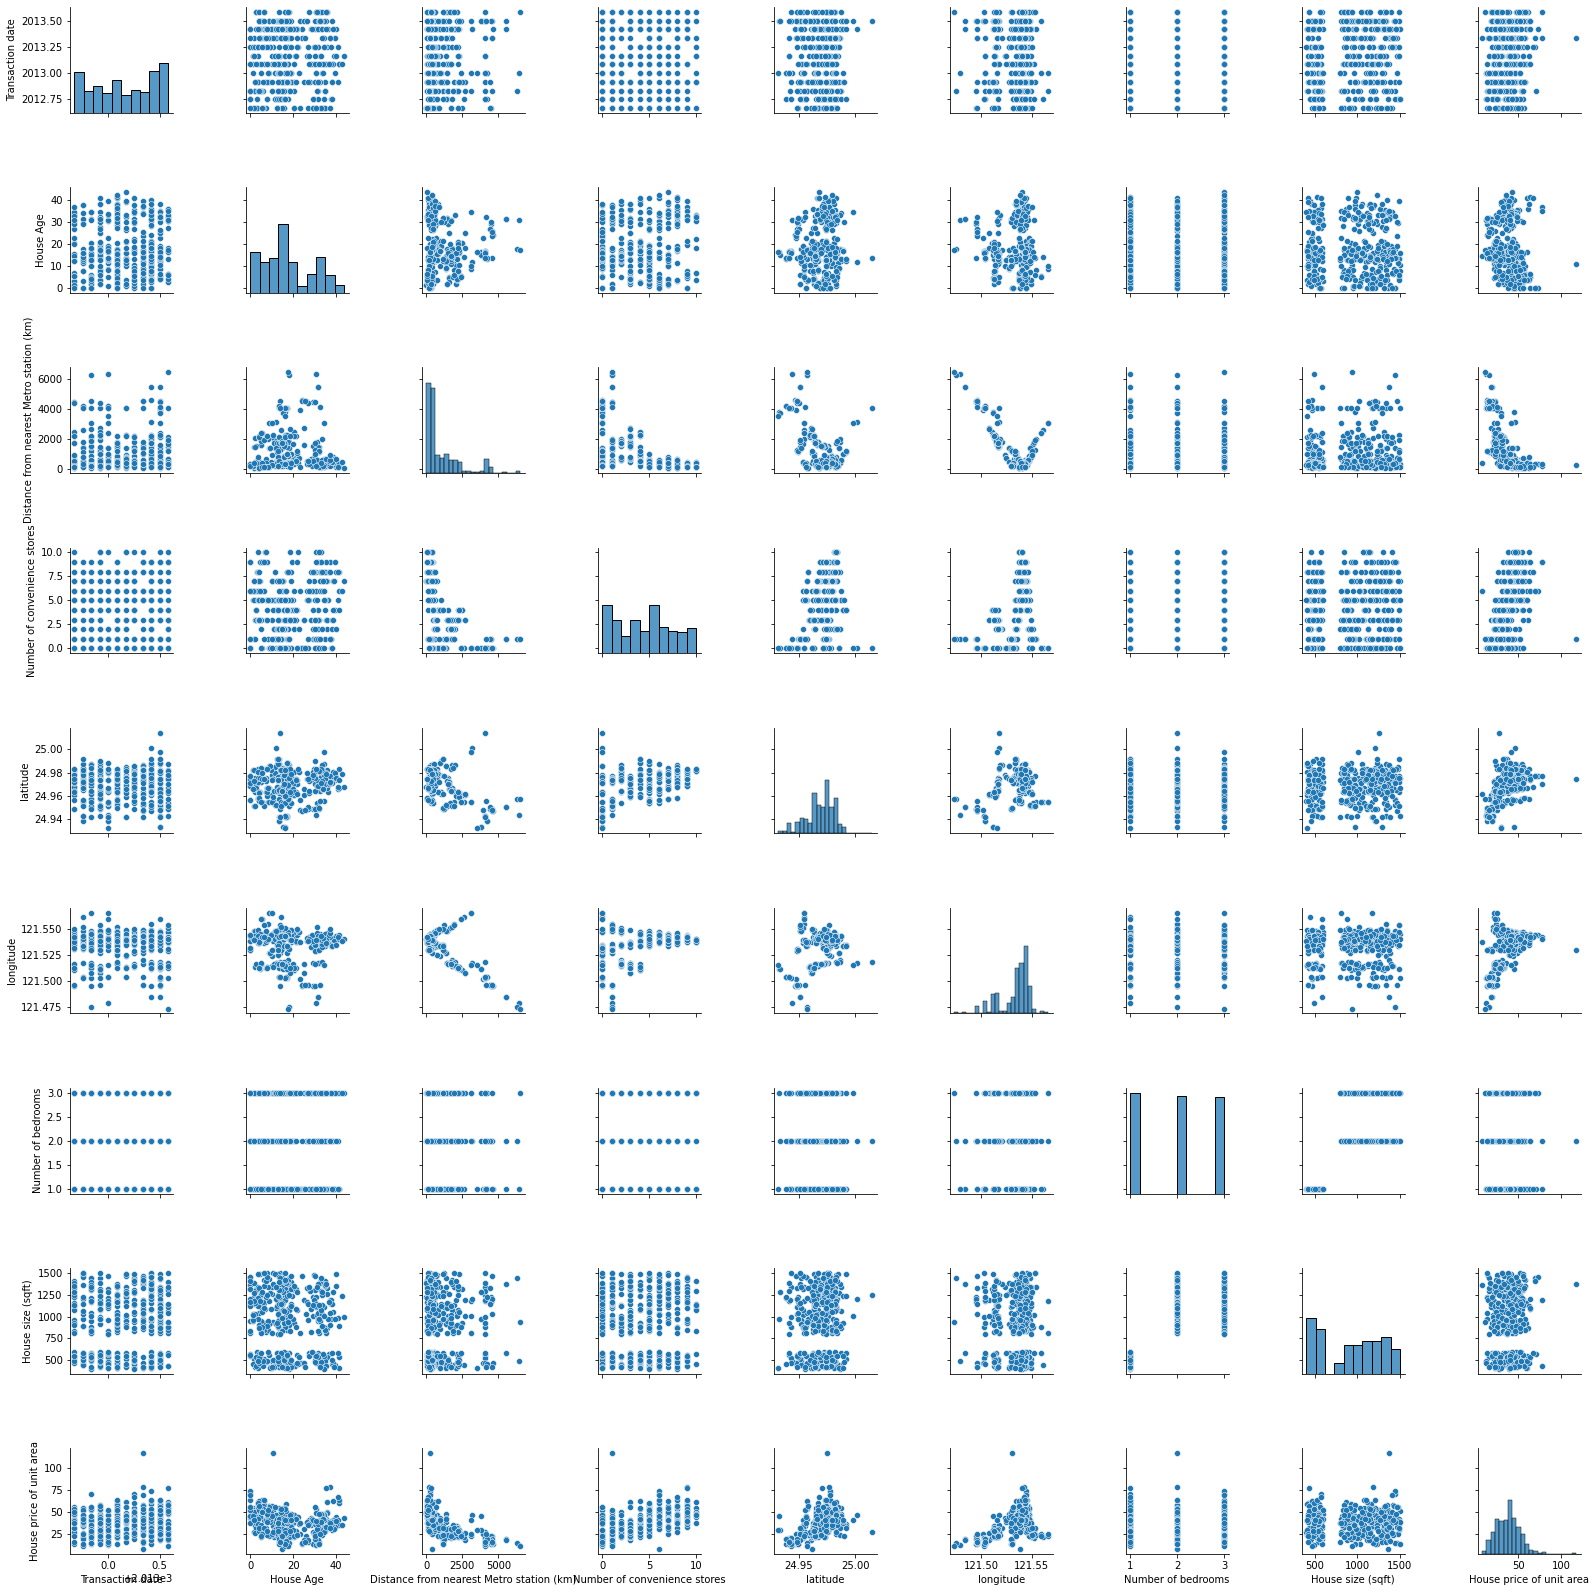

In [256]:
sns.pairplot(df);

## **Correlation Between Features**

In [257]:
fig = px.imshow(round(df.corr(), 2),text_auto=True,  aspect="auto", color_continuous_scale='RdBu')

fig.update_layout(title_text="Correlation Between Features",title_x=0.48)
fig.layout.height = 750
fig.layout.width = 1000
fig.show()

There's no significant correlation between features.

## **Variation Inflation Factor of Each Features**

In [258]:
#Import library from VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df)

,variables,VIF
0,Transaction date,4.336878e+07
1,House Age,3.911172e+00
2,Distance from nearest Metro station (km),5.364452e+00
3,Number of convenience stores,5.170731e+00
4,latitude,6.513067e+06
5,longitude,4.413196e+07
6,Number of bedrooms,1.608141e+01
7,House size (sqft),1.903962e+01
8,House price of unit area,2.087962e+01


In [259]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['longitude', 'House size (sqft)']


In [260]:
df_new = df
df.drop('longitude', axis = 1, inplace = True)

In [261]:
calc_vif(df)

,variables,VIF
0,Transaction date,6.208291e+06
1,House Age,3.863698e+00
2,Distance from nearest Metro station (km),4.208963e+00
3,Number of convenience stores,5.163822e+00
4,latitude,6.211382e+06
5,Number of bedrooms,1.607381e+01
6,House size (sqft),1.903542e+01
7,House price of unit area,1.993051e+01


In [262]:
# As Transaction Date has very high VIF, that means it is very well represented by other features
df.drop('Transaction date', axis = 1, inplace = True)

In [263]:
calc_vif(df)

,variables,VIF
0,House Age,3.804076
1,Distance from nearest Metro station (km),3.710616
2,Number of convenience stores,5.154023
3,latitude,37.816939
4,Number of bedrooms,16.065613
5,House size (sqft),19.025806
6,House price of unit area,19.245835


## **Scaling**

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['House Age', 'Distance from nearest Metro station (km)', 'House size (sqft)']].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
    'House Age', 'Distance from nearest Metro station (km)', 'House size (sqft)'])

In [265]:
df['House Age'] = df_scaled['House Age']
df['Distance from nearest Metro station (km)'] = df_scaled['Distance from nearest Metro station (km)']
df['House size (sqft)'] = df_scaled['House size (sqft)']

In [266]:
df1 = df.drop('latitude', axis = 1)

In [267]:
calc_vif(df1)

,variables,VIF
0,House Age,3.093746
1,Distance from nearest Metro station (km),1.937398
2,Number of convenience stores,5.088605
3,Number of bedrooms,14.230900
4,House size (sqft),7.633935
5,House price of unit area,8.035036


# **ML Models**

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, log_loss, roc_auc_score

In [269]:
X = df.drop("House price of unit area", axis = 1)
y = df['House price of unit area']

In [270]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [271]:
#Finding the best model 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge

#Function to choose the best model
def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },

        'ridge' :{
            'model' : Ridge(),
            'params': {
                'alpha' : np.linspace(0,10,50),
                "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=36)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])

#Calling find_best_model
find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.648599,{'normalize': False}
1,ridge,0.648599,"{'alpha': 0.0, 'solver': 'svd'}"
2,lasso,0.342752,"{'alpha': 1, 'selection': 'random'}"
3,decision_tree,0.665092,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**From above results, we can conclude that algorithm using Ordinary least square method is more appropriate here to use. Hence, Ridge regression model is appropriate model for this dataset.**